In [34]:
#Enter the asset symbol:
ticker = "SPY" #eg: "SPY"

#Enter number of years of data you wish to use:
years_A = 1 #eg: 1

#Enter the Percent Change you wish to estimate:
percent_change = -1.5 #enter a negative value for declines, eg: -3

#Enter the value of the portfolio invested in this asset:
p = 100000000 #eg: 100000000 for $100,000,000.00


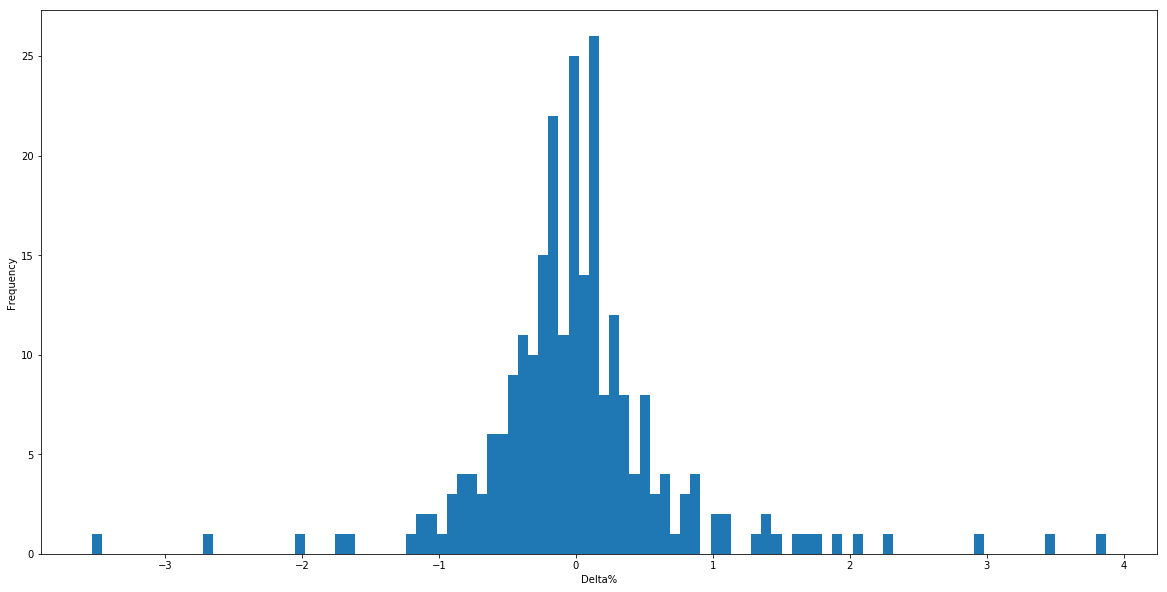

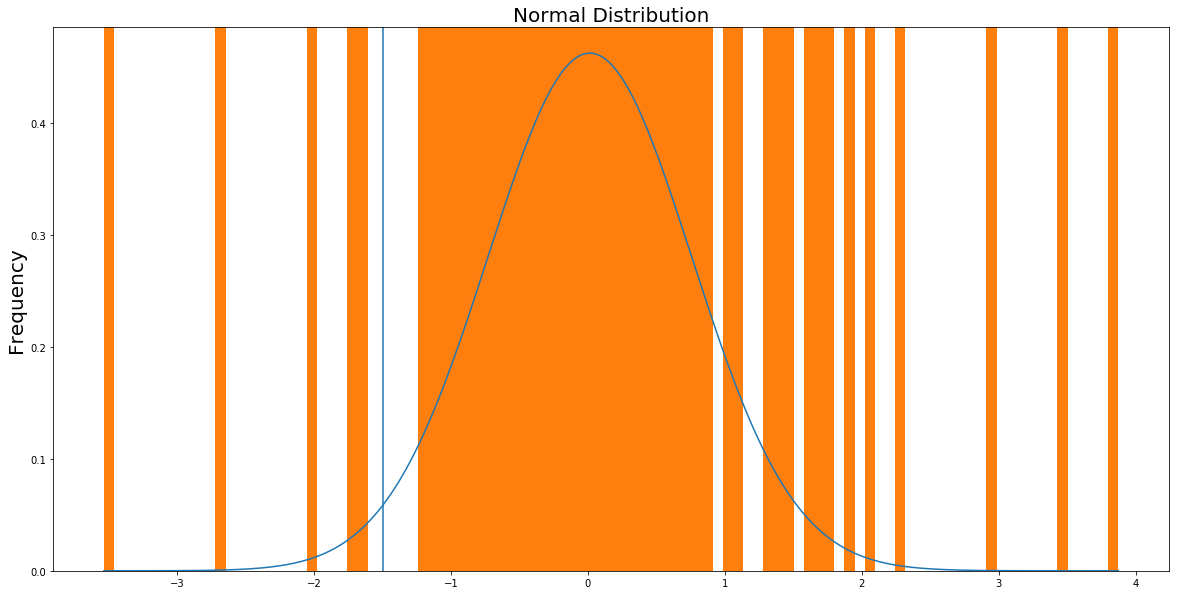

In [38]:
import pandas
import pandas_datareader.data as web
import datetime
now = datetime.datetime.now()
end = now.strftime("%Y-%m-%d")
from dateutil.relativedelta import relativedelta
then = now - relativedelta(years=years_A)
start = then.strftime("%Y-%m-%d")

import scipy.stats
import math

f = web.DataReader(ticker, 'iex', start, end)
f['delta%'] = (1-(f['close']/f['open']))*100

#if need be:
#import csv
#f.to_csv('modified_data.csv')

import numpy as np
import matplotlib.pyplot as plt
mean = np.mean(f['delta%'])
std = np.std(f['delta%'])

def probability(cutOffPoint):
    fraction = 1 / ((std) * (math.sqrt(2*math.pi)))
    exponential = math.exp(-((cutOffPoint-mean)**2) / ( 2 * (std**2)))
    result = fraction * exponential
    return result

probability = (scipy.stats.norm(mean, std).cdf(percent_change))*100
z = 2.33
sigma = std/100 #b/c the original figure is in percentage, we return the std to a real number.
value_at_risk = sigma * z * p #z-value = 2.33 @ 99% (100-1%)

f['delta%'].plot(kind='hist', bins=100, figsize=(20, 10))
plt.xlabel('Delta%')
plt.show()

#x = np.linspace(-5, 5, num = 10000)
x = np.linspace(min(f['delta%']), max(f['delta%']), num = len(f['delta%']))
constant = 1.0 / np.sqrt(2*np.pi*std) #adjust stdev here: (2*np.pi*stdev)
pdf_normal_distribution = constant * np.exp((-(x-mean)**2) / (2*std**2)) #adjust mean and stdev here: (-(x-mean)**2) / (2*stdev**2)
fig, ax = plt.subplots(figsize=(20, 10));
ax.plot(x, pdf_normal_distribution);
ax.set_ylim(0);
ax.set_title('Normal Distribution', size = 20);
ax.set_ylabel('Probability Density', size = 20);
f['delta%'].plot(kind='hist', bins=100)
plt.axvline(x=percent_change)
plt.show()


In [44]:
print "start:", start
print "end:", end 
print "Ticker:", ticker
print
print "Mean:", mean
print "Std Dev", std
print
print "A change of", percent_change, "percent has", probability, "percent probability of occuring."
print "A loss of", (percent_change/100)*p, "can be expected to occur approximately", (probability/100)*250, "days in a year."
print
print "1% Risk Profile for a", p, "dollar portfolio invested solely in", ticker, "is", value_at_risk

start: 2017-10-11
end: 2018-10-11
Ticker: SPY

Mean: 0.0135678777272
Std Dev 0.743628111324

A change of -1.5 percent has 2.0906184615519643 percent probability of occuring.
A loss of -1500000.0 can be expected to occur approximately 5.2265461538799105 days in a year.

1% Risk Profile for a 100000000 dollar portfolio invested solely in SPY is 1732653.49939
